###READ THE ZIP FILE
SO OUR FIRST STEP WAS TO READ THE ZIP FILE WHICH WAS UPLOADED IN THE COLAB. SO TO READ THE ZIP FILE AND EXTRRACT IT WE MADE THE BEOLW CODE WHICH UNZIPS THE ZIP FILE AND THEN SHOWS THE DIRECTORIES IN MY DATASET

In [ ]:
from google.colab import files
import zipfile
import os

# Specify the zip file path
zip_file_path = "/content/drive/MyDrive/DPL_DATASET_NEW.zip"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

# View the contents of the unzipped folder
unzipped_folder = os.path.splitext(zip_file_path)[0]
os.listdir(unzipped_folder)


['tiger', 'beaver', 'polar+bear', 'lion', 'leopard', 'walrus']

AS I RED MY DIRECTORIES I FOUND OUT IT HASSUB-DIRECTORIES TOO SO WE USED THIS CODE TO SEE THE IMAGES IN THE SUBDIRECTORIES AT ONE TIME.

In [ ]:
import os

# Specify the path to your unzipped directory
unzipped_directory = '/content/DPL_DATASET_NEW'

# List all subfolders in the unzipped directory
subfolders = [f for f in os.listdir(unzipped_directory) if os.path.isdir(os.path.join(unzipped_directory, f))]

# Loop through all subfolders
for subfolder in subfolders:
    subfolder_path = os.path.join(unzipped_directory, subfolder)

    # Now you can read files or perform other operations within each subfolder
    # Example: List files in the subfolder
    files_in_subfolder = os.listdir(subfolder_path)
    print(f"Files in {subfolder}: {files_in_subfolder}")


Files in polar+bear: ['polar+bear_10718.jpg', 'polar+bear_10863.jpg', 'polar+bear_10791.jpg', 'polar+bear_10683.jpg', 'polar+bear_10699.jpg', 'polar+bear_10688.jpg', 'polar+bear_10755.jpg', 'polar+bear_10736.jpg', 'polar+bear_10829.jpg', 'polar+bear_10778.jpg', 'polar+bear_10748.jpg', 'polar+bear_10784.jpg', 'polar+bear_10719.jpg', 'polar+bear_10750.jpg', 'polar+bear_10785.jpg', 'polar+bear_10772.jpg', 'polar+bear_10865.jpg', 'polar+bear_10713.jpg', 'polar+bear_10742.jpg', 'polar+bear_10763.jpg', 'polar+bear_10754.jpg', 'polar+bear_10727.jpg', 'polar+bear_10834.jpg', 'polar+bear_10731.jpg', 'polar+bear_10847.jpg', 'polar+bear_10818.jpg', 'polar+bear_10714.jpg', 'polar+bear_10706.jpg', 'polar+bear_10801.jpg', 'polar+bear_10765.jpg', 'polar+bear_10729.jpg', 'polar+bear_10697.jpg', 'polar+bear_10811.jpg', 'polar+bear_10796.jpg', 'polar+bear_10808.jpg', 'polar+bear_10701.jpg', 'polar+bear_10813.jpg', 'polar+bear_10795.jpg', 'polar+bear_10827.jpg', 'polar+bear_10737.jpg', 'polar+bear_10747.

#DATA PREPROCESSING

###RESIZING IMAGES
WE RESIZED THE IMAGES TO  256x256 FOR OUR PROJECT BECAUSE MY DATASET HAS VARIETY NUMER OF SIZES SO I CONVERTED IT TO 256x256 TO KEEP ALL THE IMAGES IN A PROPER RANGE. AS IT IS ALSO GOOD FOR MY MACHINE LEARNING ALGORITHM AS IT GIVES ALL EQUAL IMAGES THORUGH THE DATASET.

In [ ]:
from PIL import Image
import os

# Specify the path to the main dataset folder
main_dataset_folder = '/content/DPL_DATASET_NEW'

# Specify the target size for resizing
target_size = (256, 256)

# Specify the directory to save the resized images
save_directory = '/content/Resized_Dataset'

# Create the save directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Loop through each subdirectory and resize images
for class_label in os.listdir(main_dataset_folder):
    class_path = os.path.join(main_dataset_folder, class_label)

    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Open the image using PIL
            img = Image.open(img_path)

            # Resize the image
            resized_img = img.resize(target_size)

            # Save the resized image to the new directory
            save_path = os.path.join(save_directory, class_label, filename)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            resized_img.save(save_path)


READ RANDOM IMAGES FROM MAIN DATAET AND RESIZED DATASET AND THEN COMAPRE IT WITH EAH OTHER AND PRINTS AN IAMGE FOR THE SAMPLE.

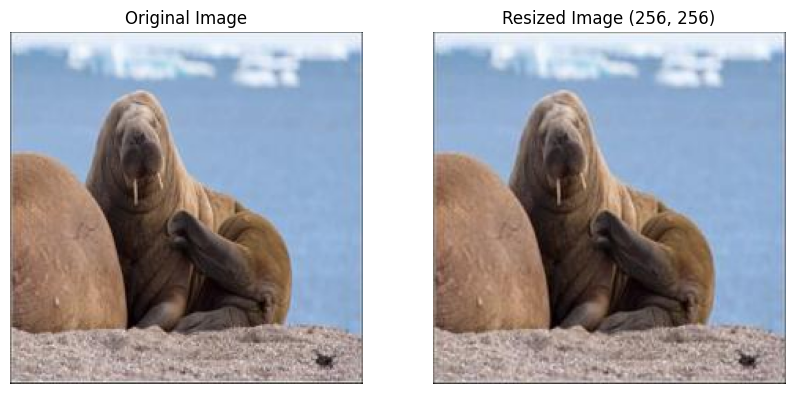

In [ ]:
import matplotlib.pyplot as plt
import random

# Function to compare original and resized images
def compare_original_resized(dataset_folder, sample_class, sample_image, target_size):
    plt.figure(figsize=(10, 5))

    # Original Image
    original_path = os.path.join(dataset_folder, sample_class, sample_image)
    original_img = Image.open(original_path)

    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')

    # Resized Image
    resized_path = os.path.join('/content/Resized_Dataset', sample_class, sample_image)
    resized_img = Image.open(resized_path)

    plt.subplot(1, 2, 2)
    plt.imshow(resized_img)
    plt.title(f'Resized Image ({target_size[0]}, {target_size[1]})')
    plt.axis('off')

    plt.show()

# Choose a random sample class
sample_class = random.choice(os.listdir('/content/DPL_DATASET_NEW'))

# Choose a random image from the sample class
sample_image = random.choice(os.listdir(os.path.join('/content/DPL_DATASET_NEW', sample_class)))

# Specify the target size for resizing
target_size = (256, 256)

# Call the function to compare images
compare_original_resized('/content/DPL_DATASET_NEW', sample_class, sample_image, target_size)


###NORMALIZATION

In [ ]:
import numpy as np
import cv2
import os

main_dataset_folder = '/content/Resized_Dataset'
normalized_dataset_folder = '/content/Normalized_Dataset'

os.makedirs(normalized_dataset_folder, exist_ok=True)

for class_label in os.listdir(main_dataset_folder):
    class_path = os.path.join(main_dataset_folder, class_label)
    output_class_path = os.path.join(normalized_dataset_folder, class_label)

    if os.path.isdir(class_path):
        os.makedirs(output_class_path, exist_ok=True)

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            output_img_path = os.path.join(output_class_path, filename)


            image = cv2.imread(img_path)

            # Normalize pixel values to the range [0, 1]
            normalized_image = image / 255.0

            cv2.imwrite(output_img_path, (normalized_image * 255).astype(np.uint8))


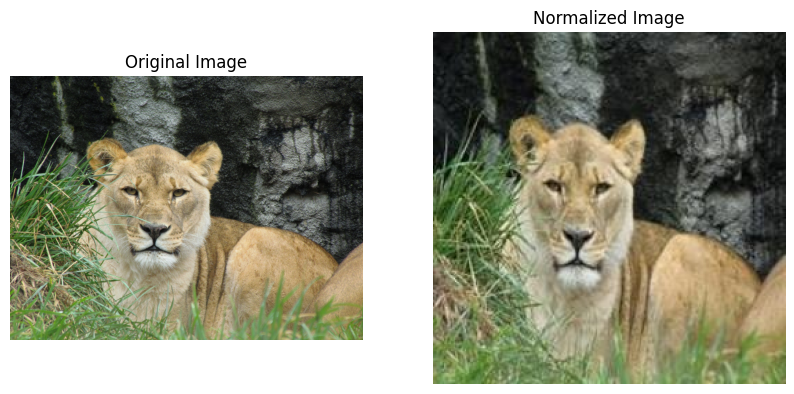

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Function to compare original and normalized images
def compare_original_normalized(main_dataset_folder, normalized_dataset_folder, sample_class, sample_image):
    plt.figure(figsize=(10, 5))

    # Original Image
    original_path = os.path.join(main_dataset_folder, sample_class, sample_image)
    original_img = Image.open(original_path)

    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')

    # Normalized Image
    normalized_path = os.path.join(normalized_dataset_folder, sample_class, sample_image)
    normalized_img = Image.open(normalized_path)

    plt.subplot(1, 2, 2)
    plt.imshow(normalized_img)
    plt.title('Normalized Image')
    plt.axis('off')

    plt.show()

# Choose a random sample class
sample_class = random.choice(os.listdir('/content/DPL_DATASET_NEW'))

# Choose a random image from the sample class
sample_image = random.choice(os.listdir(os.path.join('/content/DPL_DATASET_NEW', sample_class)))

# Specify the paths to the main dataset folder and normalized dataset folder
main_dataset_folder = '/content/DPL_DATASET_NEW'
normalized_dataset_folder = '/content/Normalized_Dataset'

# Call the function to compare images
compare_original_normalized(main_dataset_folder, normalized_dataset_folder, sample_class, sample_image)


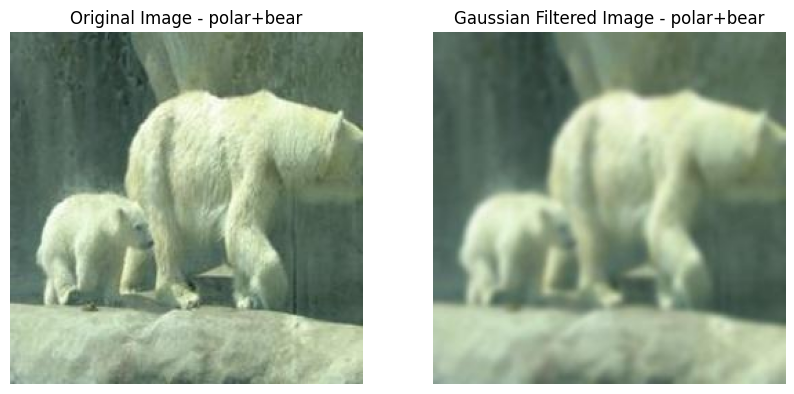

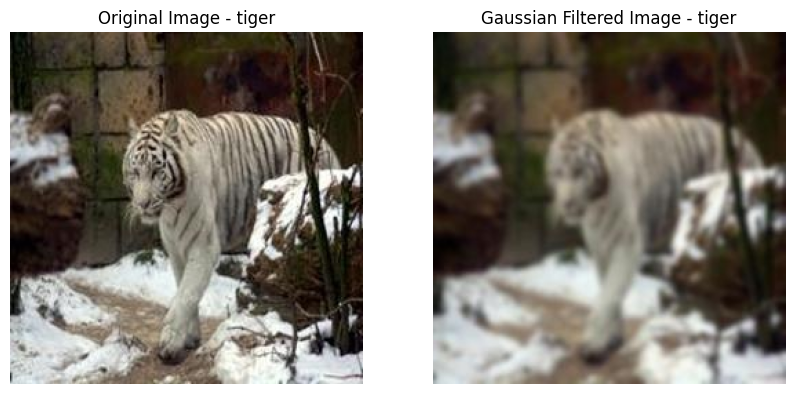

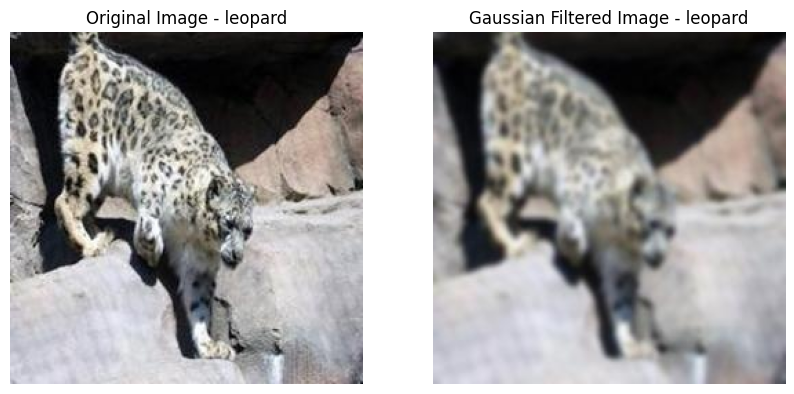

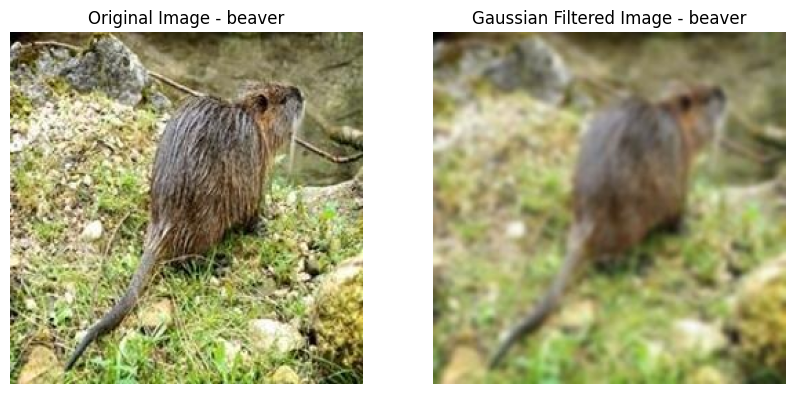

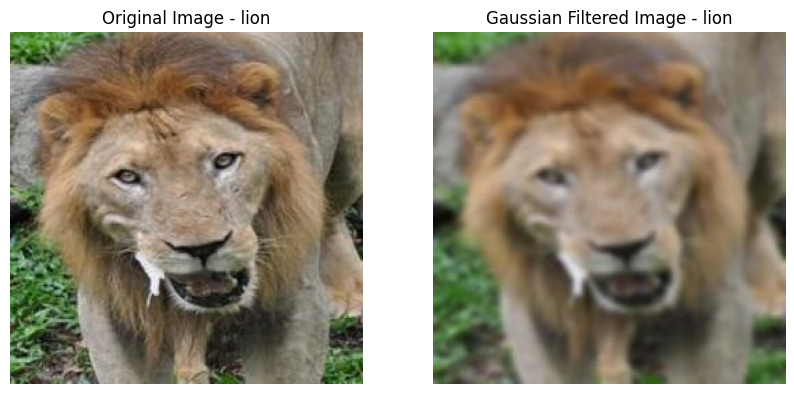

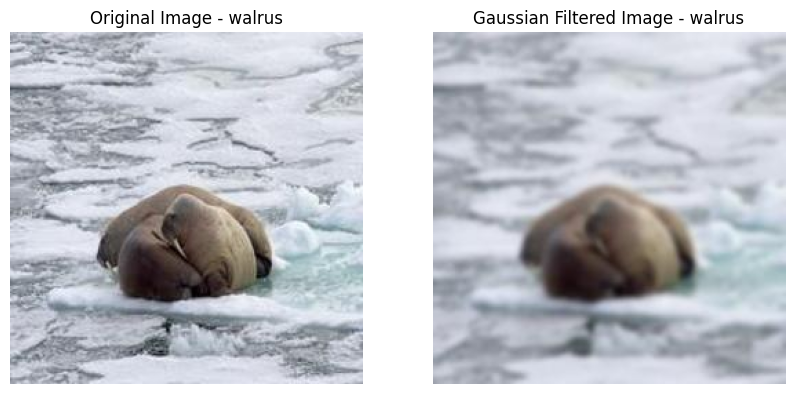

In [ ]:
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import random

# Specify the paths to the main dataset folder and filtered dataset folder
main_dataset_folder = '/content/Normalized_Dataset'
filtered_dataset_folder = '/content/Gaussian_Filtered_Dataset'  # Replace with the actual path

# Create the filtered dataset folder if it doesn't exist
os.makedirs(filtered_dataset_folder, exist_ok=True)

# Function to apply Gaussian filter to images
def apply_gaussian_filter(class_label, original_folder, filtered_folder):
    original_class_path = os.path.join(original_folder, class_label)
    filtered_class_path = os.path.join(filtered_folder, class_label)

    # Create the filtered class folder if it doesn't exist
    os.makedirs(filtered_class_path, exist_ok=True)

    for filename in os.listdir(original_class_path):
        original_img_path = os.path.join(original_class_path, filename)
        filtered_img_path = os.path.join(filtered_class_path, filename)

        # Open the original image
        original_img = Image.open(original_img_path)

        # Apply Gaussian filter
        filtered_img = original_img.filter(ImageFilter.GaussianBlur(radius=2))

        # Save the filtered image
        filtered_img.save(filtered_img_path)

# Apply Gaussian filter to all images in each class
for class_label in os.listdir(main_dataset_folder):
    if os.path.isdir(os.path.join(main_dataset_folder, class_label)):
        apply_gaussian_filter(class_label, main_dataset_folder, filtered_dataset_folder)

        # Display one sample image (original and filtered)
        sample_image = random.choice(os.listdir(os.path.join(main_dataset_folder, class_label)))

        # Original Image
        original_path = os.path.join(main_dataset_folder, class_label, sample_image)
        original_img = Image.open(original_path)

        # Filtered Image
        filtered_path = os.path.join(filtered_dataset_folder, class_label, sample_image)
        filtered_img = Image.open(filtered_path)

        # Plot side-by-side
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(original_img)
        plt.title(f'Original Image - {class_label}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(filtered_img)
        plt.title(f'Gaussian Filtered Image - {class_label}')
        plt.axis('off')

        plt.show()


#EDA

###ORIGINAL SIZE X RESHAPED SIZE

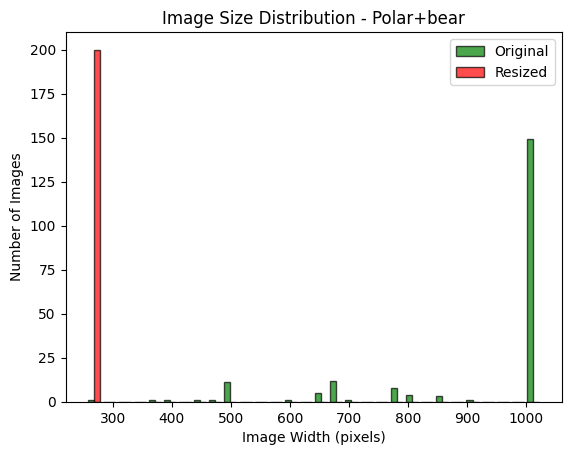

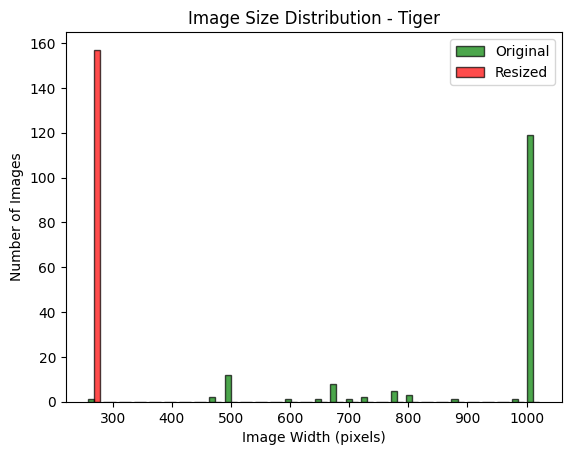

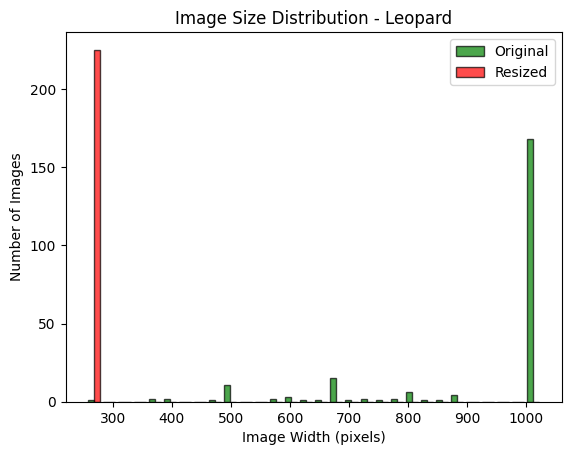

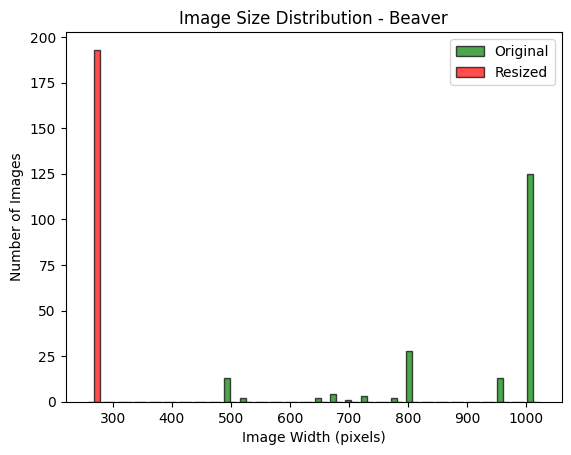

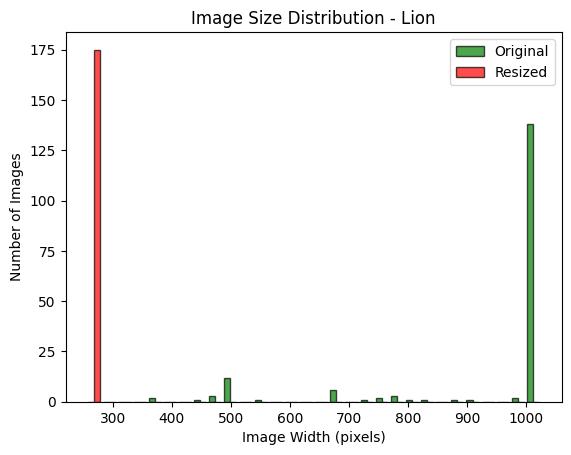

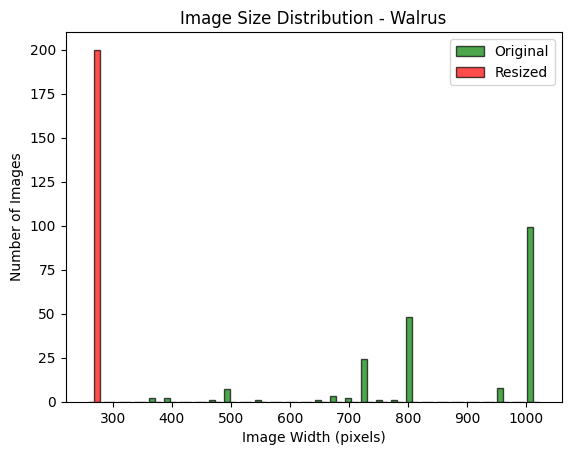

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Specify the path to the main dataset folder
main_dataset_folder = '/content/DPL_DATASET_NEW'

# Function to get image sizes
def get_image_sizes(class_label, original=True):
    sizes = []
    class_path = os.path.join(main_dataset_folder, class_label)

    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = Image.open(img_path)
        sizes.append(img.size if original else img.resize(target_size).size)

    return sizes

# Function to plot histogram for image sizes
def plot_image_size_histogram(class_label, original_sizes, resized_sizes):
    flat_original_sizes = [item[0] for item in original_sizes]
    flat_resized_sizes = [item[0] for item in resized_sizes]

    # Use green for original and red for resized
    colors = ['green', 'red']

    plt.hist([flat_original_sizes, flat_resized_sizes], bins=30, color=colors, edgecolor='black', alpha=0.7, label=['Original', 'Resized'])
    plt.title(f'Image Size Distribution - {class_label.capitalize()}')
    plt.xlabel('Image Width (pixels)')
    plt.ylabel('Number of Images')
    plt.legend()
    plt.show()

# Specify the target size for resizing
target_size = (256, 256)

# Loop through each class and plot histogram
for class_label in os.listdir(main_dataset_folder):
    if os.path.isdir(os.path.join(main_dataset_folder, class_label)):
        original_sizes = get_image_sizes(class_label, original=True)
        resized_sizes = get_image_sizes(class_label, original=False)
        plot_image_size_histogram(class_label, original_sizes, resized_sizes)


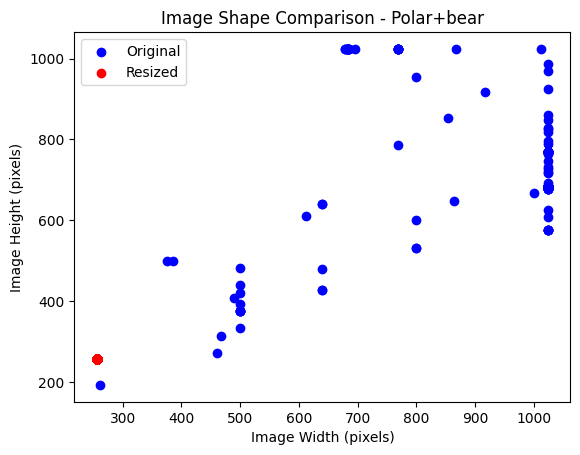

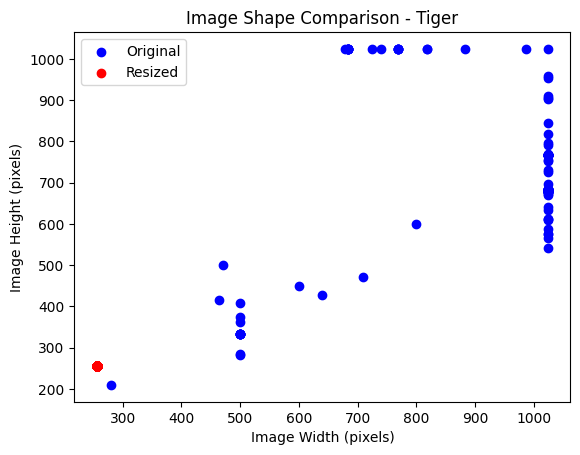

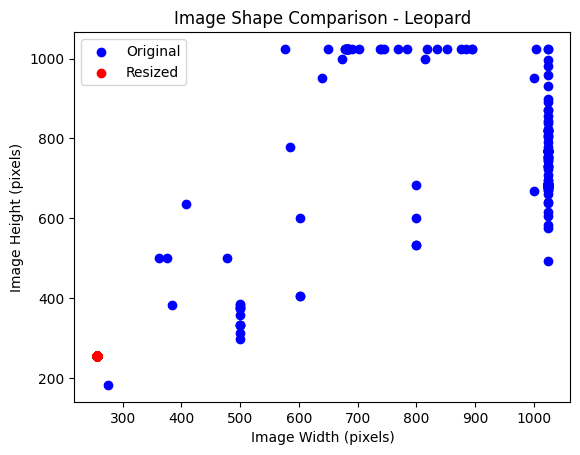

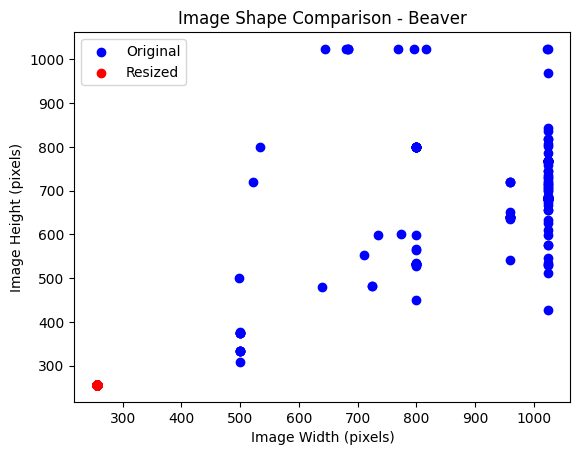

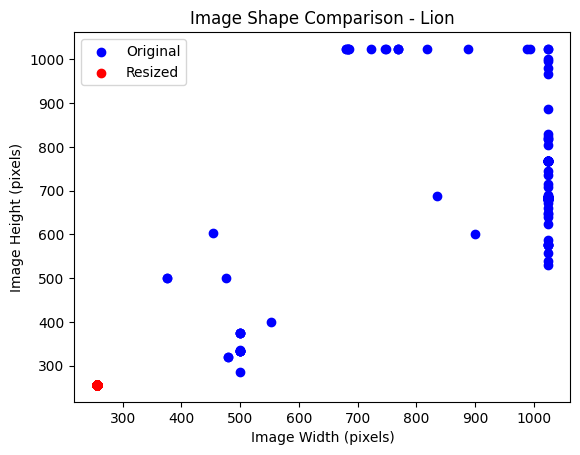

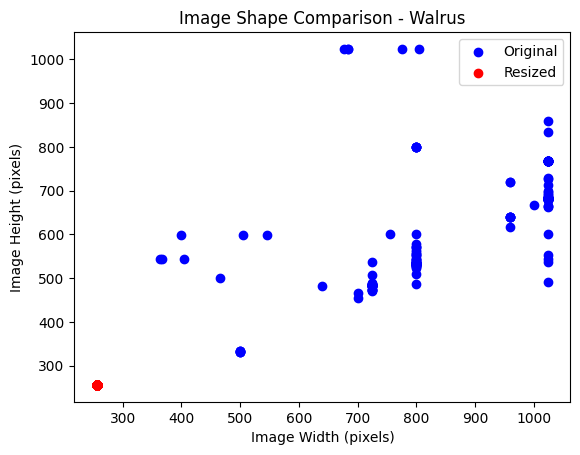

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Specify the paths to the main dataset folder and resized dataset folder
main_dataset_folder = '/content/DPL_DATASET_NEW'
resized_dataset_folder = '/content/Resized_Dataset'  # Replace with the actual path

# Function to compare shapes of original and resized images
def compare_shapes(class_label, original_folder, resized_folder):
    original_shapes = []
    resized_shapes = []

    original_class_path = os.path.join(original_folder, class_label)
    resized_class_path = os.path.join(resized_folder, class_label)

    for filename in os.listdir(original_class_path):
        original_img_path = os.path.join(original_class_path, filename)
        resized_img_path = os.path.join(resized_class_path, filename)

        original_img = Image.open(original_img_path)
        resized_img = Image.open(resized_img_path)

        original_shapes.append(original_img.size)
        resized_shapes.append(resized_img.size)

    return original_shapes, resized_shapes

# Loop through each class and plot shapes
for class_label in os.listdir(main_dataset_folder):
    if os.path.isdir(os.path.join(main_dataset_folder, class_label)):
        original_shapes, resized_shapes = compare_shapes(class_label, main_dataset_folder, resized_dataset_folder)

        # Plot original and resized shapes
        original_widths, original_heights = zip(*original_shapes)
        resized_widths, resized_heights = zip(*resized_shapes)

        plt.scatter(original_widths, original_heights, color='blue', label='Original')
        plt.scatter(resized_widths, resized_heights, color='red', label='Resized')

        plt.title(f'Image Shape Comparison - {class_label.capitalize()}')
        plt.xlabel('Image Width (pixels)')
        plt.ylabel('Image Height (pixels)')
        plt.legend()
        plt.show()


###NORMALIZATION

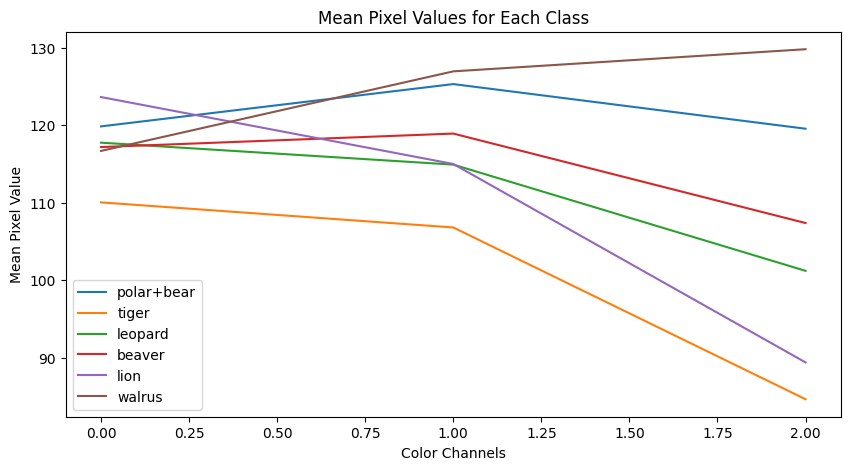

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Specify the paths to the main dataset folder and normalized dataset folder
main_dataset_folder = '/content/DPL_DATASET_NEW'
normalized_dataset_folder = '/content/Normalized_Dataset'  # Replace with the actual path

# Function to compute mean pixel values
def compute_mean_pixel_values(class_label, dataset_folder):
    class_path = os.path.join(dataset_folder, class_label)
    mean_pixel_values = []

    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = plt.imread(img_path)
        mean_pixel_values.append(np.mean(img, axis=(0, 1)))

    return np.mean(mean_pixel_values, axis=0)

# Loop through each class and compute mean pixel values
class_labels = os.listdir(main_dataset_folder)
mean_pixel_values_per_class = []

for class_label in class_labels:
    if os.path.isdir(os.path.join(main_dataset_folder, class_label)):
        mean_pixel_values = compute_mean_pixel_values(class_label, normalized_dataset_folder)
        mean_pixel_values_per_class.append(mean_pixel_values)

# Convert to NumPy array for easier manipulation
mean_pixel_values_per_class = np.array(mean_pixel_values_per_class)

# Plot the mean pixel values for each class
plt.figure(figsize=(10, 5))
for i, class_label in enumerate(class_labels):
    plt.plot(mean_pixel_values_per_class[i], label=class_label)

plt.title('Mean Pixel Values for Each Class')
plt.xlabel('Color Channels')
plt.ylabel('Mean Pixel Value')
plt.legend()
plt.show()


###gaussain

<ipython-input-6-66c837d2a6fa>:38: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  filtered_img = gaussian(np.array(original_img), sigma=1, multichannel=True)


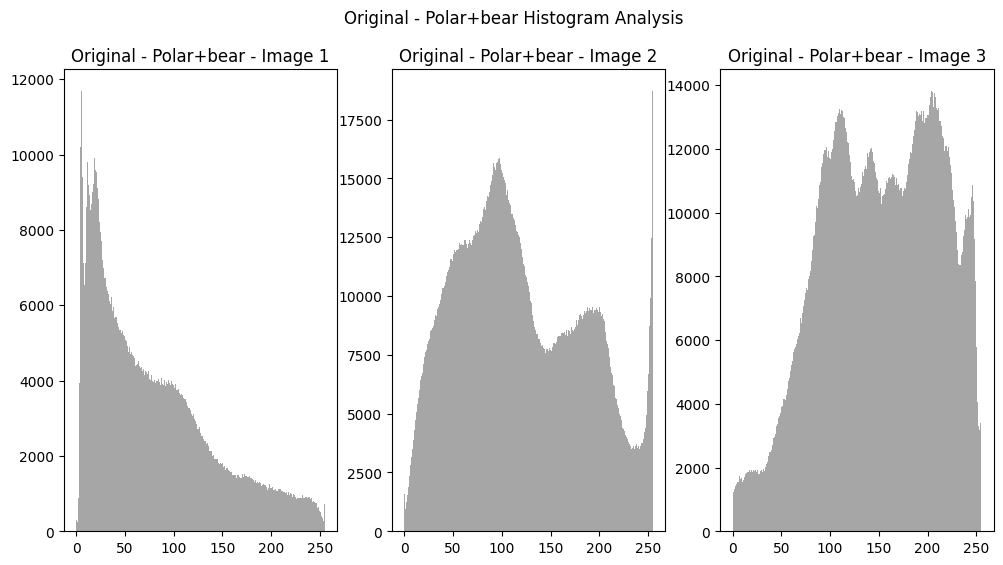

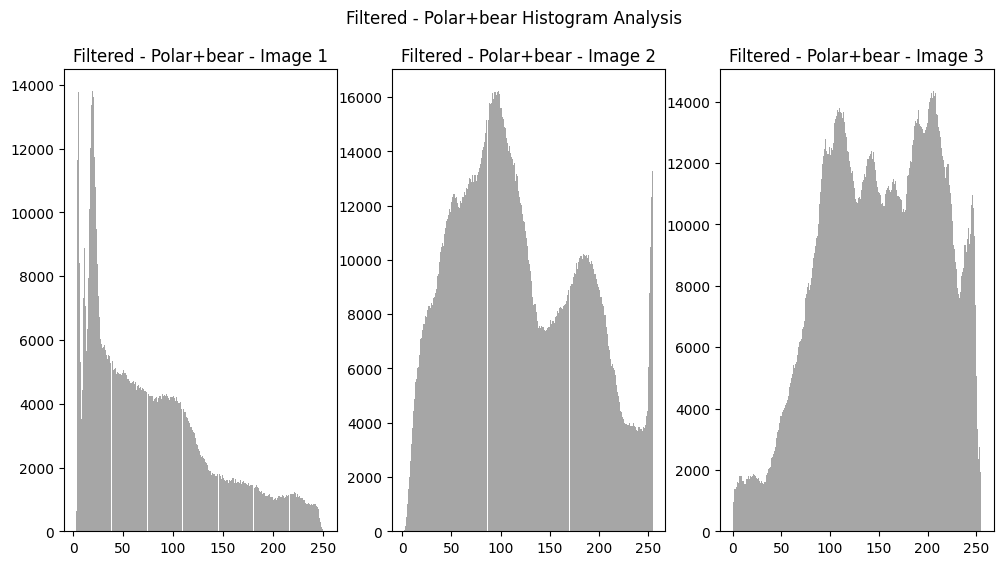

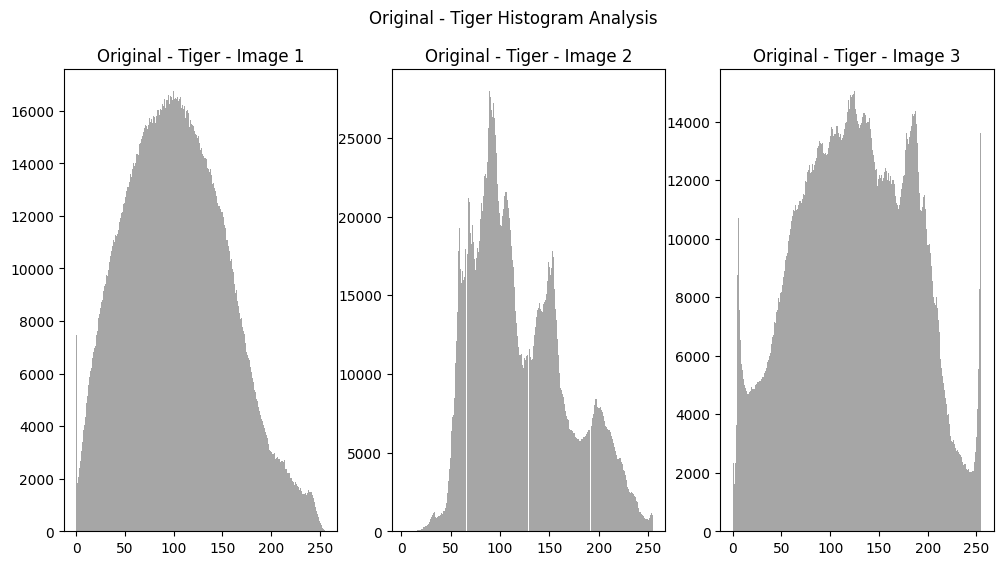

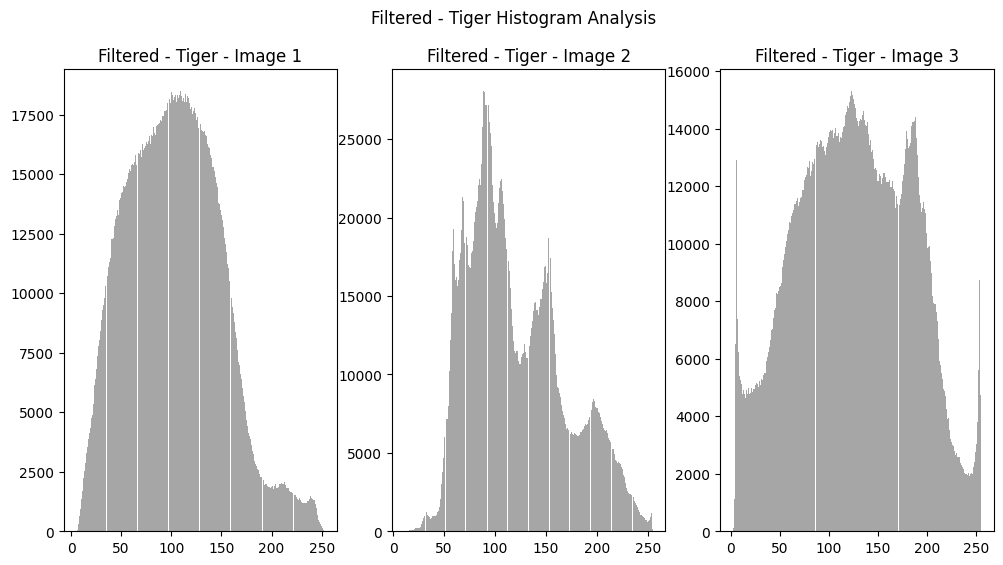

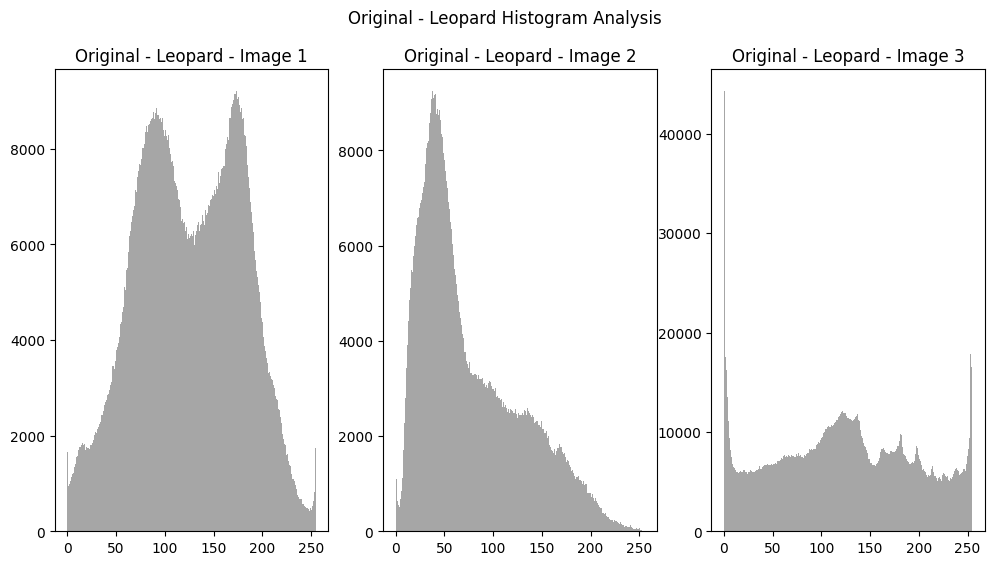

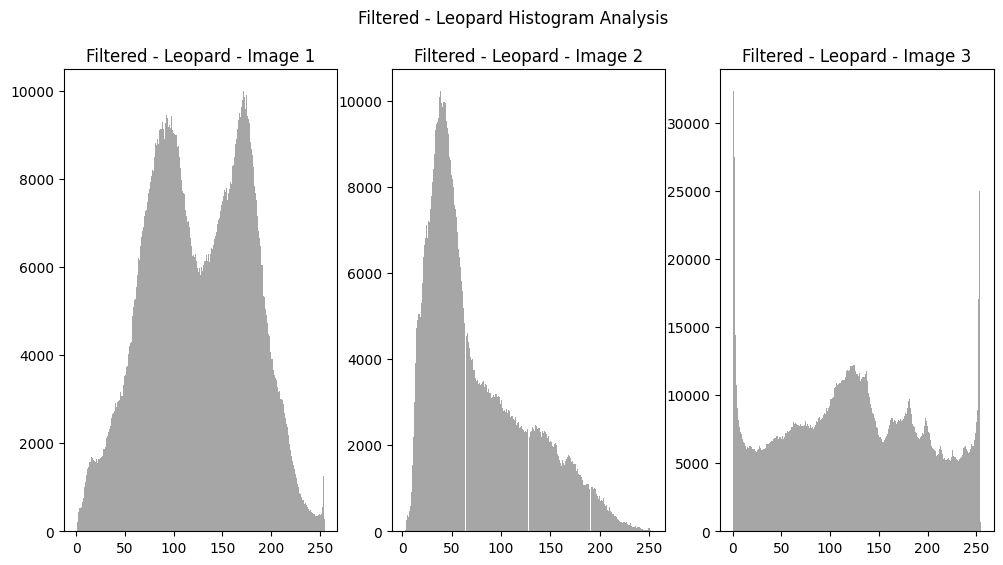

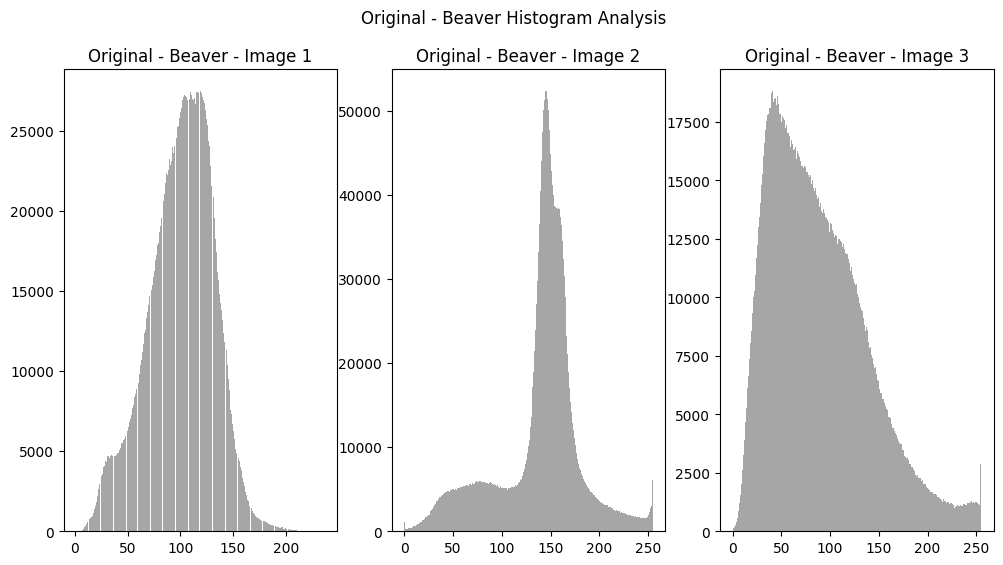

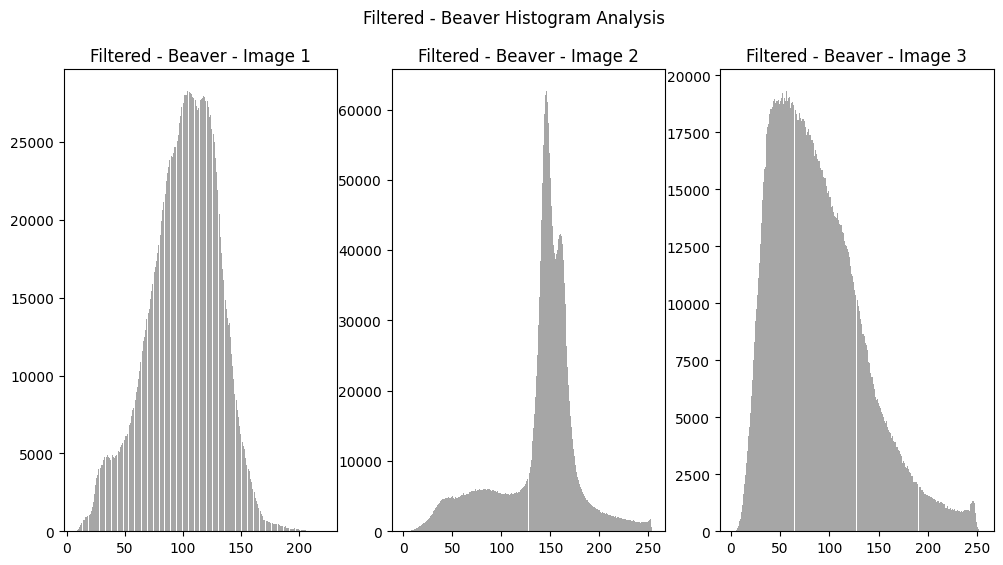

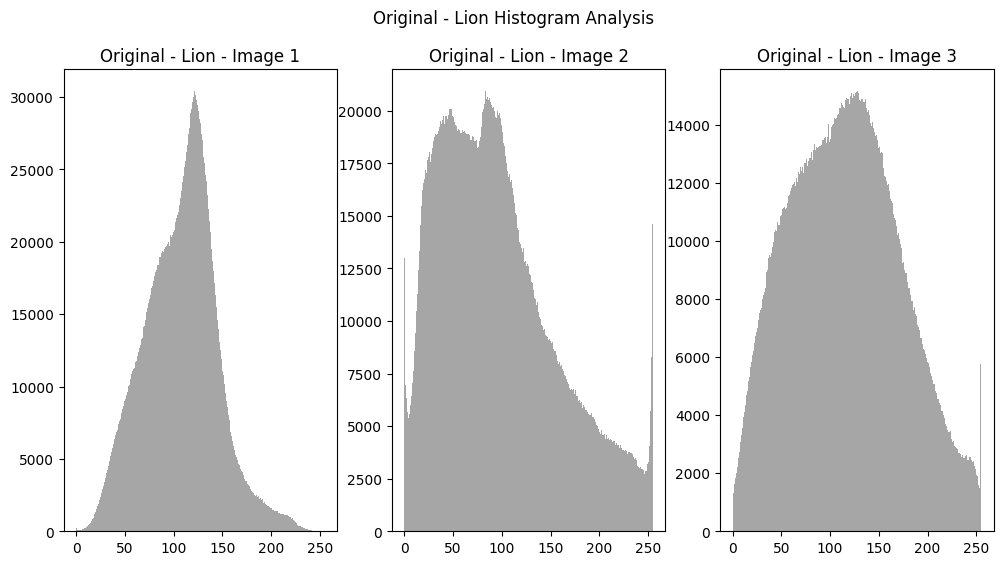

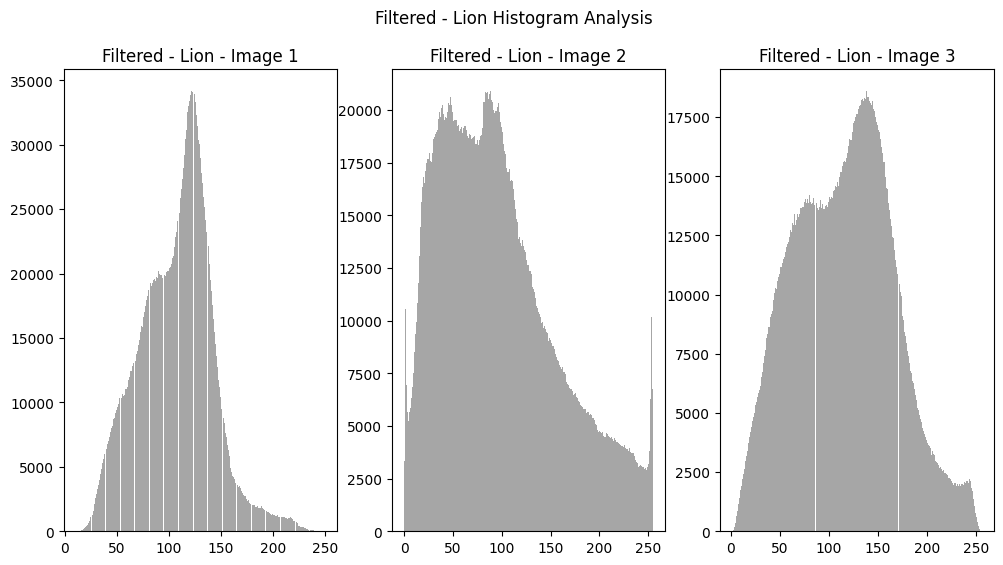

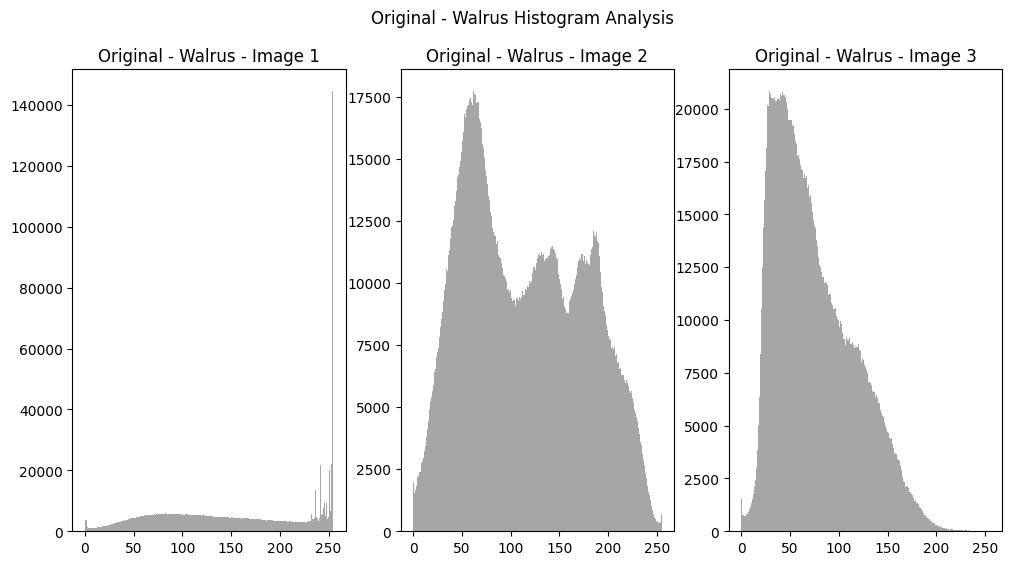

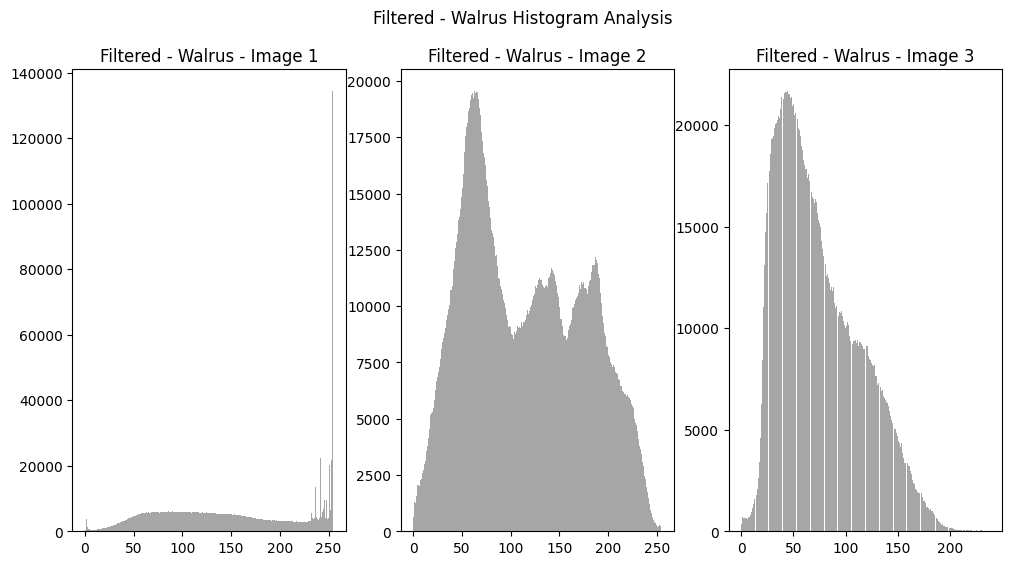

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.filters import gaussian
from skimage import img_as_ubyte

# Specify the paths to the main dataset folder and filtered dataset folder
main_dataset_folder = '/content/DPL_DATASET_NEW'
filtered_dataset_folder = '/content/Filtered_Dataset'  # Replace with the actual path

# Function to calculate histogram for a list of images
def calculate_histogram(images, title):
    plt.figure(figsize=(12, 6))

    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.hist(np.array(img).ravel(), bins=256, color='gray', alpha=0.7)
        plt.title(f'{title} - Image {i + 1}')

    plt.suptitle(title + ' Histogram Analysis')
    plt.show()

# Loop through each class and perform histogram analysis
for class_label in os.listdir(main_dataset_folder):
    if os.path.isdir(os.path.join(main_dataset_folder, class_label)):
        original_images = []
        filtered_images = []

        # Load and filter a few images from each class
        for filename in os.listdir(os.path.join(main_dataset_folder, class_label))[:3]:
            original_path = os.path.join(main_dataset_folder, class_label, filename)
            filtered_path = os.path.join(filtered_dataset_folder, class_label, filename)

            original_img = Image.open(original_path)

            # Apply Gaussian filter using skimage
            filtered_img = gaussian(np.array(original_img), sigma=1, multichannel=True)
            filtered_img = img_as_ubyte(filtered_img)  # Convert back to 8-bit for display

            original_images.append(original_img)
            filtered_images.append(Image.fromarray(filtered_img))

        # Calculate and plot histograms
        calculate_histogram(original_images, f'Original - {class_label.capitalize()}')
        calculate_histogram(filtered_images, f'Filtered - {class_label.capitalize()}')
